<p style="font-family: Arial; font-size:2.5em;color:green; font-style:bold"><br>
Employee Attrition
</p><br>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will analyze a dataset of employees to gain insights on employee attrition. You may refer to the Word document for data description and variable definitions.

In [4]:
# Import packages: pandas, matplotlib, seaborn, statsmodels, etc. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# Read in the dataset
emp_df = pd.read_csv('Datasets/Employee_Attrition.csv')

In [6]:
# Check basic information using .info(), .columns and .head()
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1. Understand the dataset. There are 35 variables. To better understand them, we can conceptually organize them into different categories. Use the Word document, categorize the variable names to their corresponding categories and write them in the cell below. I wrote one as an example. <br>
After this exercise, you will have a clear picture of the variables and what they measure.

In [7]:
# Identifier
  # 'EmployeeNumber'
    
# Attrition
  # 'Attrition'
    
# Employee demographics
  # 'Age', 'Education', 'EducationField', 'Gender', 'MaritalStatus'
    
# Job-related
  # 'BusinessTravel', 'Department','JobInvolvement', 'JobLevel', 'JobRole'
  # 'JobSatisfaction','OverTime'

# Work environment
  # 'DistanceFromHome', 'EnvironmentSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance'
    
# Compensation
 # 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate','PercentSalaryHike', 
 #  'StockOptionLevel'

# Performance
 # 'PerformanceRating'

# Job history
 # 'TotalWorkingYears', 'TrainingTimesLastYear', 'NumCompaniesWorked'
 # 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'

# Variables with constant values for the whole dataset
 # 'EmployeeCount', 'Over18', 'StandardHours'

2. For the purpose of building a model to predict attrition, which variable is the target variable? Explore this variable distribution. How many employees have left the company?

The target variable is going to be ['Attrition']. I will use matplotlib to visualize the current level of attrition.

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Attrition'>

Text(0.5, 1.0, 'Employee Attrition Count')

Text(0.5, 0, 'Attrition')

Text(0, 0.5, 'Count of Employees')

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

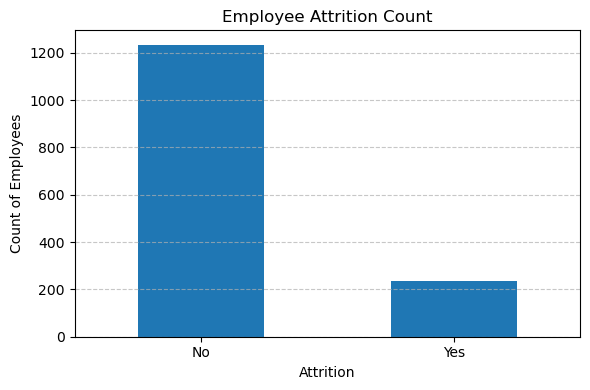

In [8]:
attrition_counts = emp_df['Attrition'].value_counts()

plt.figure(figsize=(6, 4))
attrition_counts.plot(kind='bar')

plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count of Employees')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Let's start to prepare the data for analysis. First, we can drop the following variables: the identifier and variables with constant values. They do not contribute any information to the analysis.

In [9]:
attrition = emp_df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

4. We may expect the variables of compensation may be correlated with each other. For instance, montly income and monthly rate should be correlated. Please explore the correlation between them using both numbers and a graph. Do the same for 'DailyRate', 'HourlyRate' and 'MonthlyRate'. What do you find? 

In [10]:
# Check correlation between MonthlyIncome and MonthlyRate
print(attrition[['MonthlyIncome', 'MonthlyRate']].corr())

# Check correlation among DailyRate, HourlyRate, and MonthlyRate
print(attrition[['DailyRate', 'HourlyRate', 'MonthlyRate']].corr())

               MonthlyIncome  MonthlyRate
MonthlyIncome       1.000000     0.034814
MonthlyRate         0.034814     1.000000
             DailyRate  HourlyRate  MonthlyRate
DailyRate     1.000000    0.023381    -0.032182
HourlyRate    0.023381    1.000000    -0.015297
MonthlyRate  -0.032182   -0.015297     1.000000


5. Make histograms for all the compensation variables. What do you find?

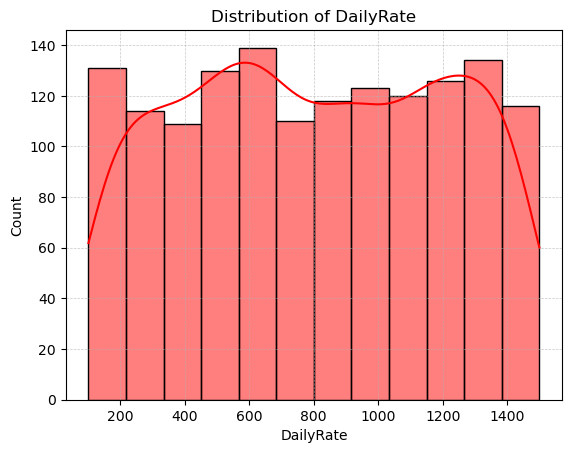

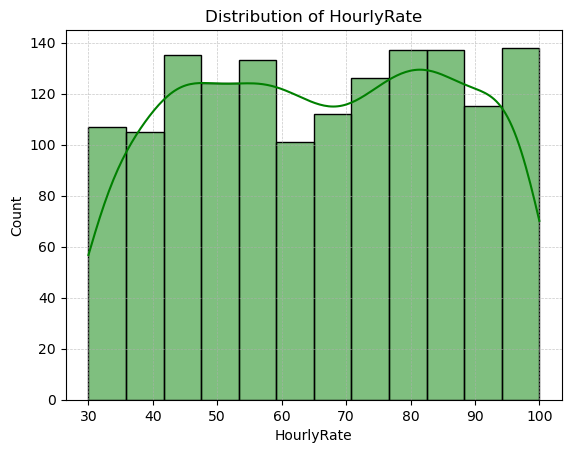

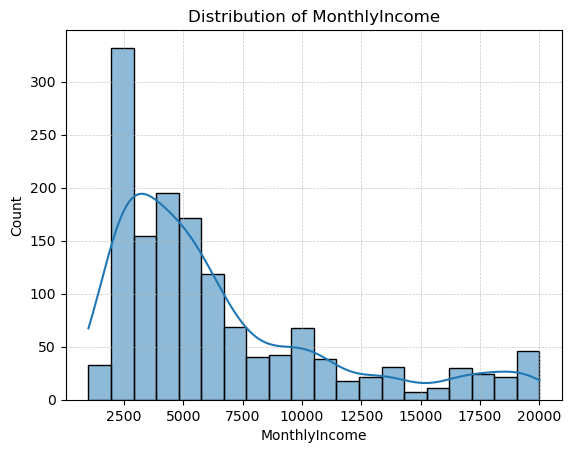

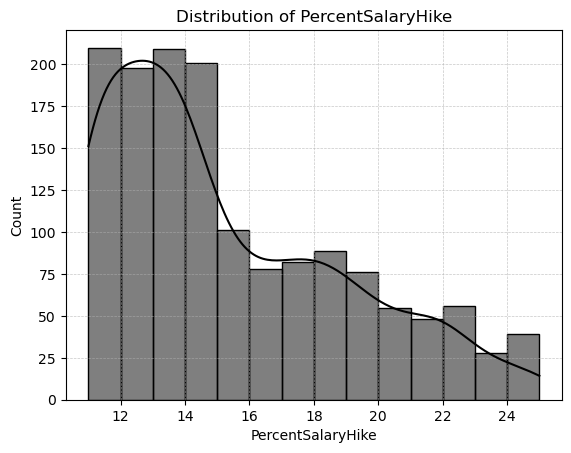

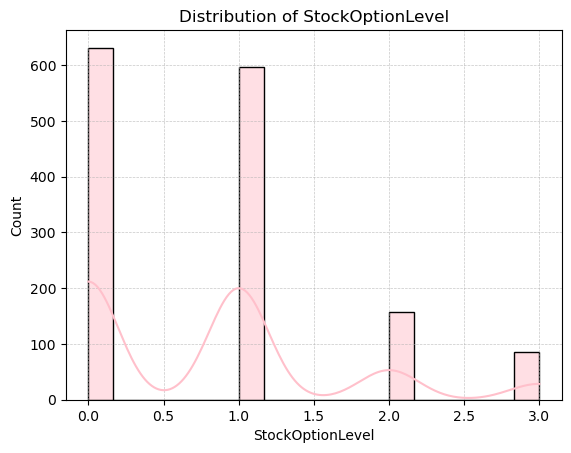

In [37]:
# Hist of 'DailyRate'
plt.figure()
sns.histplot(emp_df['DailyRate'], color='red', kde=True)
plt.title('Distribution of DailyRate')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'HourlyRate'
plt.figure()
sns.histplot(emp_df['HourlyRate'], color='green', kde=True)
plt.title('Distribution of HourlyRate')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'MonthlyIncome'
plt.figure()
sns.histplot(emp_df['MonthlyIncome'], kde=True)
plt.title('Distribution of MonthlyIncome')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'PercentSalaryHike'
plt.figure()
sns.histplot(emp_df['PercentSalaryHike'], color='black', kde=True)
plt.title('Distribution of PercentSalaryHike')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'StockOptionLevel'
plt.figure()
sns.histplot(emp_df['StockOptionLevel'], color='pink', kde=True)
plt.title('Distribution of StockOptionLevel')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7);

From these histograms, we can see that

The distribution of 'MonthlyIncome', 'PercentSalaryHike' and 'StockOptionLevel' seem to follow a skewed normal distribution that fit our common sense, but the rate variable distributions do not seem so. So, we decide to drop the rate variables.

6. Make a graph to examine the relationship between 'Attrition' and 'MonthlyIncome'. What do you find?

Based on the exploration of Step 4, 5, and 6. We may decide that to include only 'MonthlyIncome', 'PercentSalaryHike', and 'StockOptionLevel' in the model. (The correlation analysis is not consistent with our common sense, which may indicate that the rate variables may have problems. So, we decide not to use them.)

7. Let's move to explore demographic variables, using the education variables as an example. I made a graph to examine their combined distribution, which can represent the pivot table of the two variables. From the graph, you may find that most employees are in the fields of life sciences and medical. Bachelor's degrees are the most across fields.<br>
<br>
<I>Now you may pick one variable in demographics to explore its relationship with Attrition. For categorical variables, you may use the countplot as in my example to display.</I>

In [12]:
pd.pivot_table(data = attrition, index = 'Education', columns = 'EducationField',
               values = 'Attrition', aggfunc = 'count')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Education,,,,,,
1,2,67,14,63,5,19
2,2,116,24,99,19,22
3,16,233,59,183,24,57
4,5,173,52,104,33,31
5,2,17,10,15,1,3


<Figure size 1000x600 with 0 Axes>

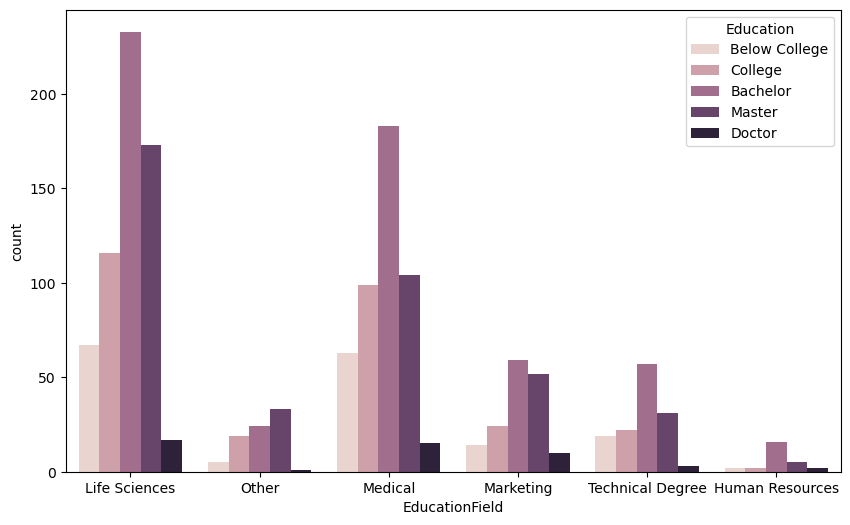

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = attrition, x = 'EducationField', hue = 'Education')
ax.legend(title='Education', labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

8. Next is to the category of 'Job related'. Examine 'JobRole' with two graphs: its distrition and relationship with Attrition. What do you find? Which roles are more likely to leave?

I did the same for every job related variables. I intended to explore whether these variables play a role and the results will guide the model building later. The conclusion is that all these variables seem to be relevant to attrition outcome.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

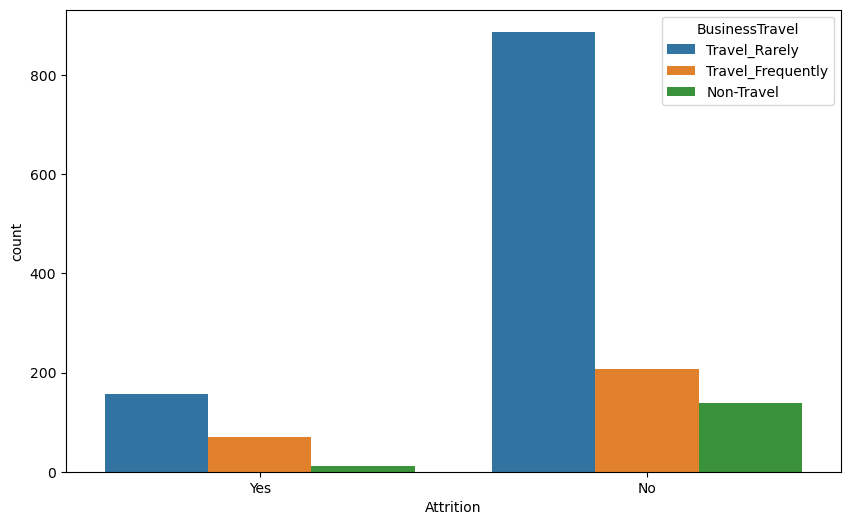

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

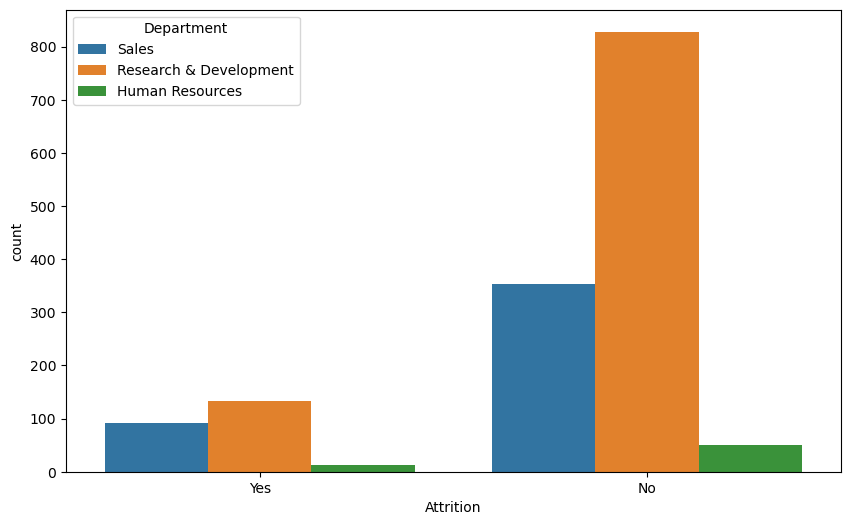

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

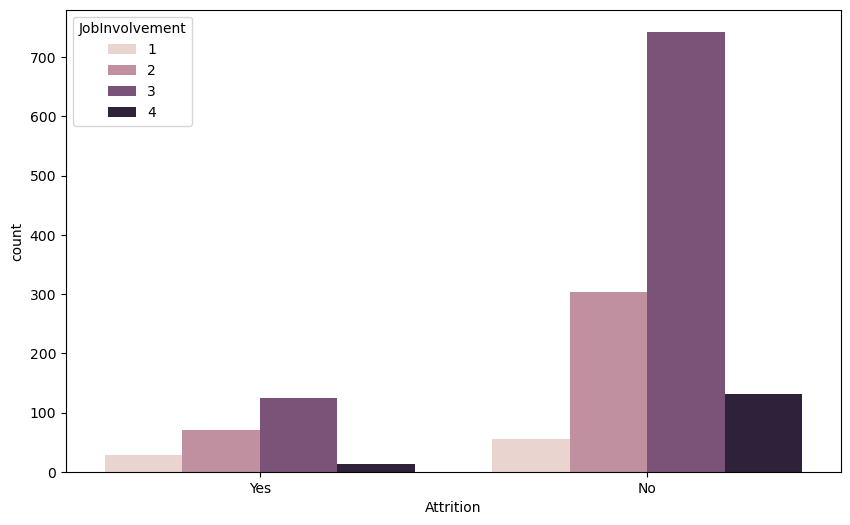

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

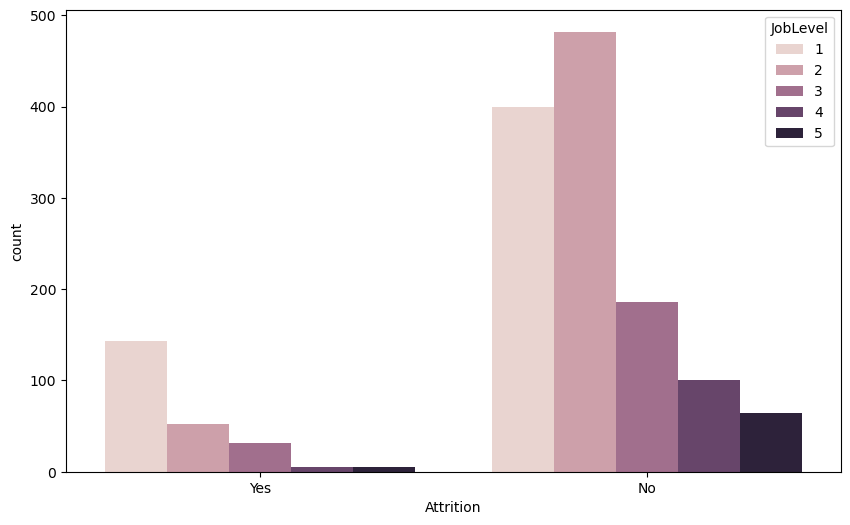

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

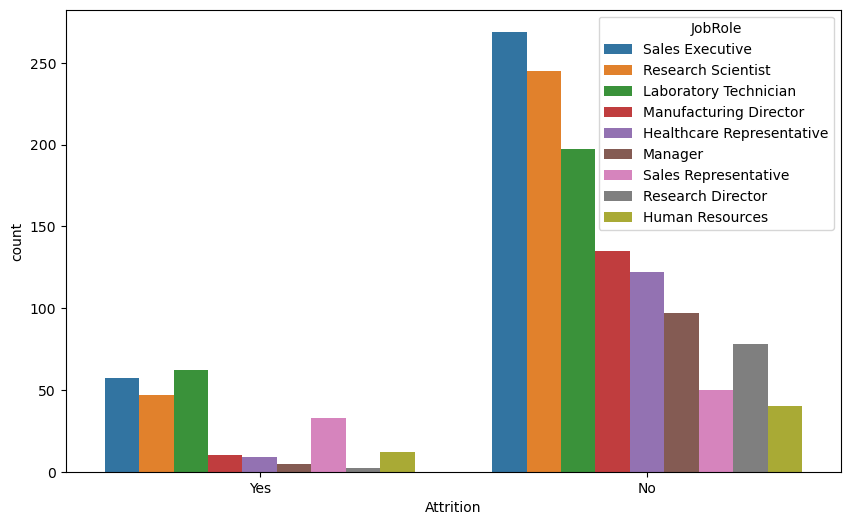

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

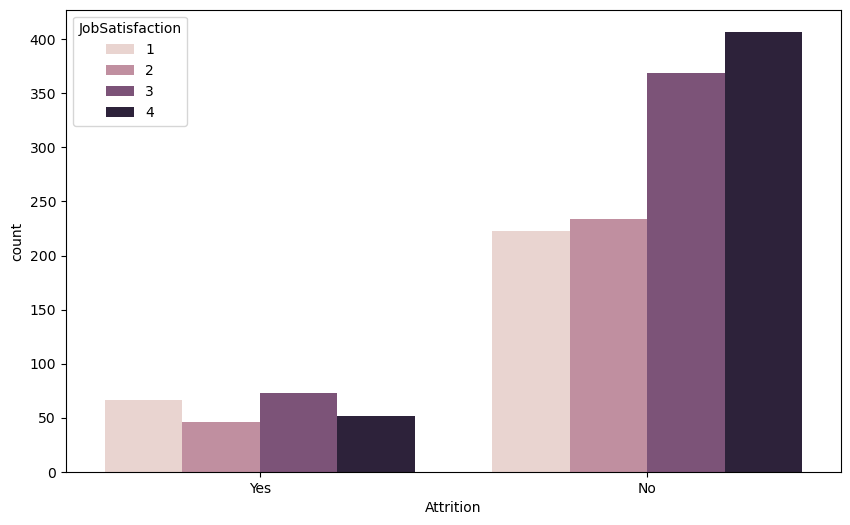

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

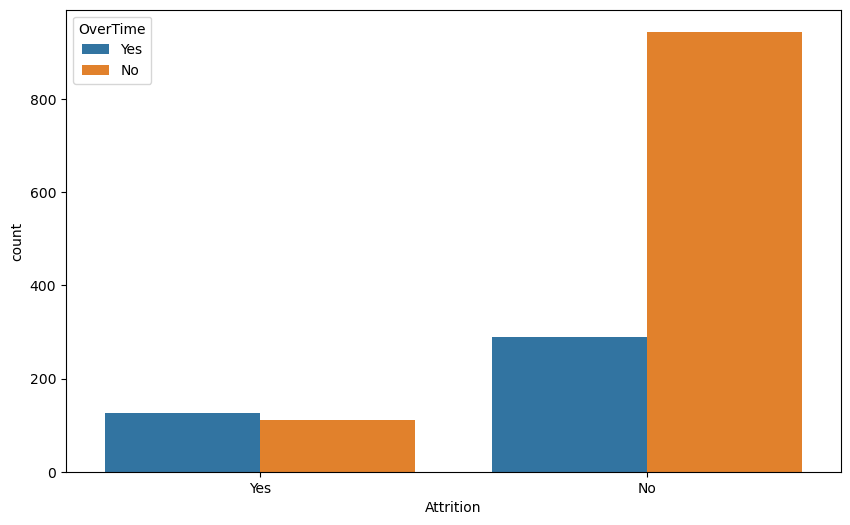

In [14]:
for var in ['BusinessTravel', 'Department','JobInvolvement', 'JobLevel', 'JobRole',
  'JobSatisfaction','OverTime']:
   # if attrition[var].dtype == 'int64':
    #    plt.figure(figsize=(10, 6))
     #   sns.boxplot(data = attrition, x = 'Attrition', y = var)
      #  plt.show()
    #else:
        plt.figure(figsize=(10, 6))
        sns.countplot(data = attrition, x = 'Attrition', hue = var)
        plt.show()

# More likely to leave:
  # Frequent traveler
  # Sales department
  # Low job involvement
  # Level 1 jobs
  # Sales related roles
  # low job satisfaction
  # More overtime

9. Let's move to work environment features. Similarly, pick one variable to examine its distritbution and relationship with attrition. Report your findings.

I explored all these variables and decided that we will include them in the model.

10. The last group of variables is about work history. 

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

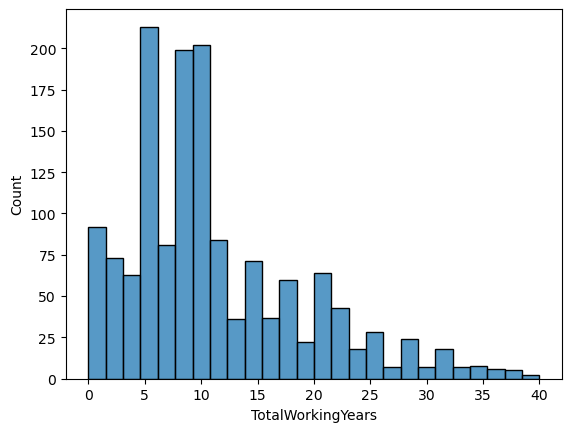

<Axes: xlabel='TrainingTimesLastYear', ylabel='Count'>

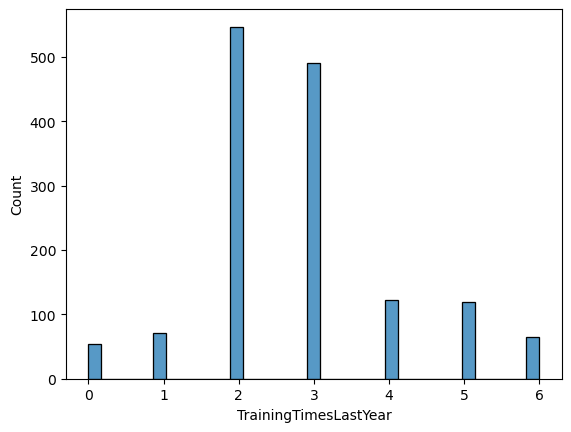

<Axes: xlabel='NumCompaniesWorked', ylabel='Count'>

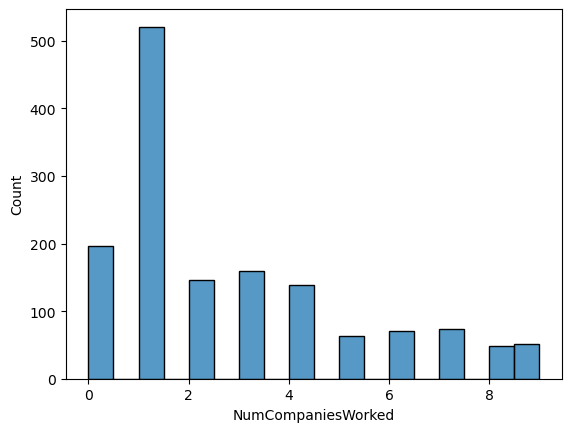

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

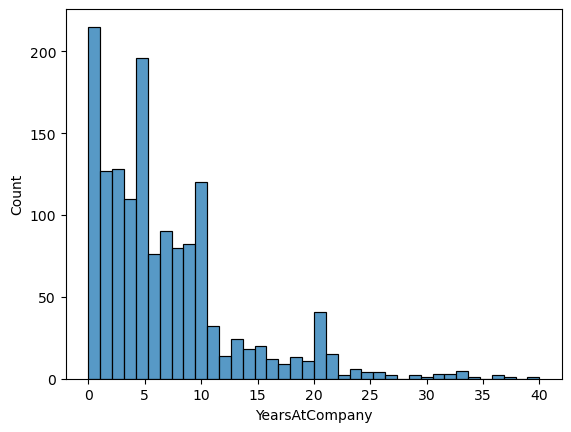

<Axes: xlabel='YearsInCurrentRole', ylabel='Count'>

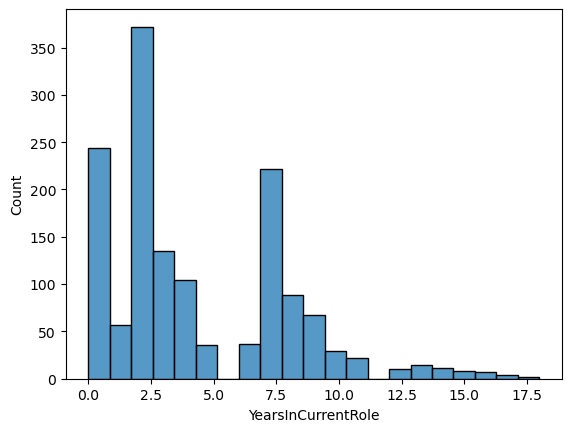

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

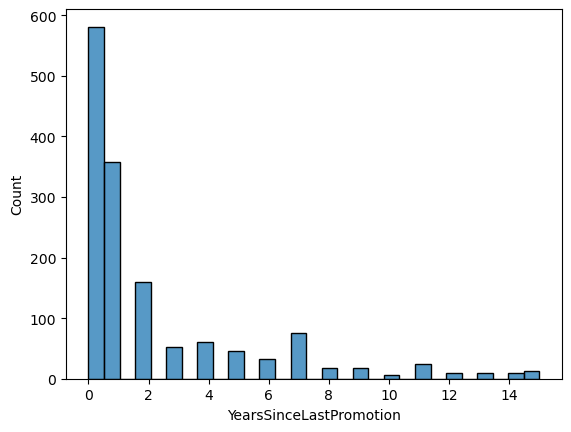

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

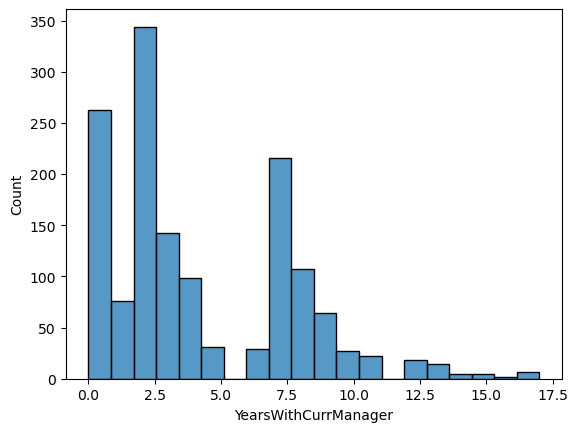

In [15]:
history_var = ['TotalWorkingYears', 'TrainingTimesLastYear', 'NumCompaniesWorked',
 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
for var in history_var:
    sns.histplot(data = attrition, x = var)
    plt.show()

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

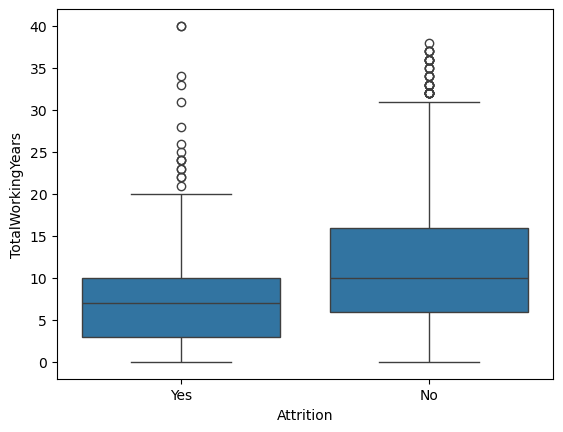

<Axes: xlabel='Attrition', ylabel='TrainingTimesLastYear'>

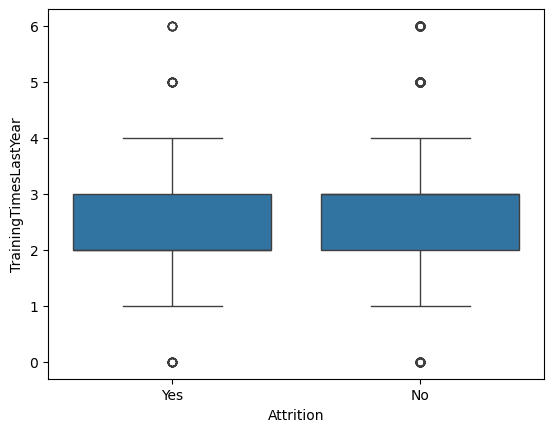

<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

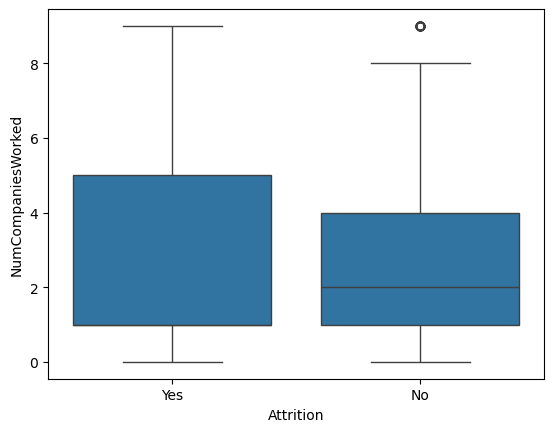

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

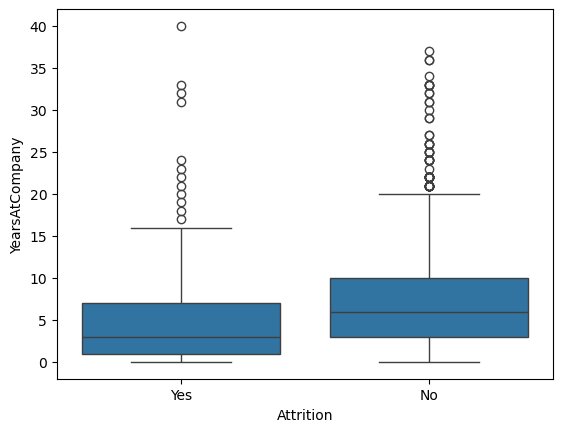

<Axes: xlabel='Attrition', ylabel='YearsInCurrentRole'>

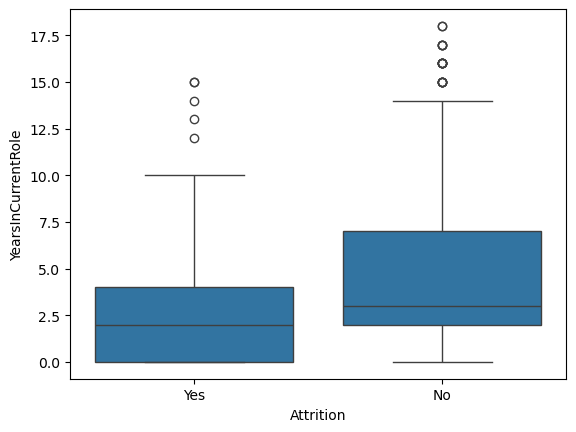

<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

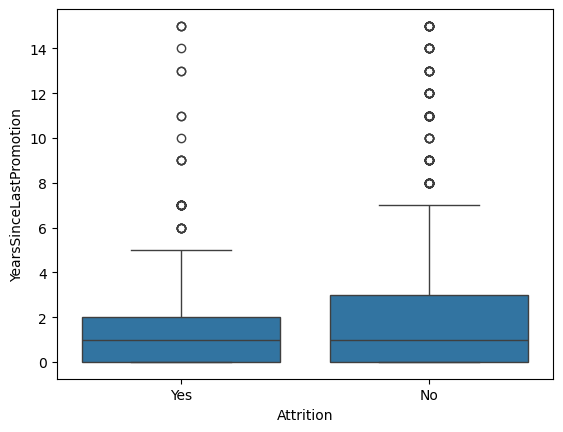

<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

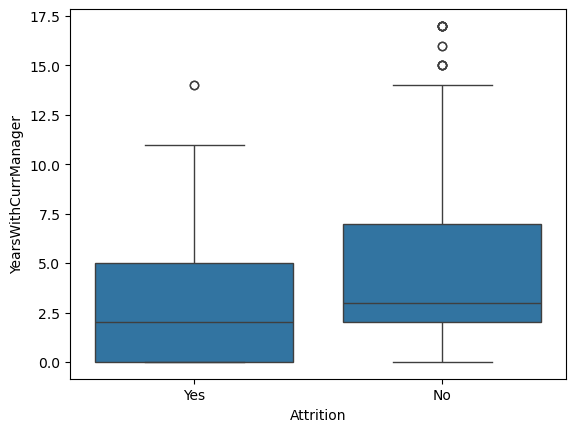

In [16]:
for var in history_var:
    sns.boxplot(data = attrition, x = 'Attrition', y = var)
    plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

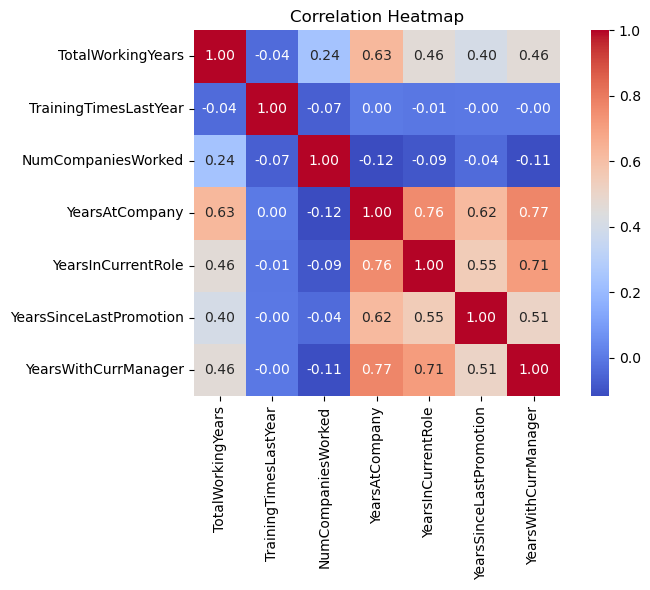

In [17]:
# Plot the correlation matrix of history variables
hist_corr = attrition[history_var].corr()
# plot
plt.figure(figsize=(8, 6))
sns.heatmap(hist_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(attrition[history_var])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [19]:
vif

,Variable,VIF
0,const,9.614324
1,TotalWorkingYears,1.979328
2,TrainingTimesLastYear,1.005278
3,NumCompaniesWorked,1.217294
4,YearsAtCompany,4.494398
5,YearsInCurrentRole,2.668855
6,YearsSinceLastPromotion,1.663605
7,YearsWithCurrManager,2.724068


I checked their collinearity using correlation and VIF. Although VIF values are not very alarming, I still decide to drop 'YearsAtCompany', as it is highly correlated with two other variables 'YearsInCurrentRole' and 'YearsWithCurrManager'.

In [20]:
attrition.drop('YearsAtCompany', axis = 1, inplace = True)

11. I checked for missing values and did not find any.  Please refer to the slides "Data Preparation - Feature Engineering" for detailed information about what we need to do to prepare features for our model building.<br> 
Let's assume we do not need generate new features.

In [21]:
attrition.isna().sum()
# No missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

12. Finally, we will code the categorical variables. Some variables have already been ordinally coded, such as Education and the satisfaction variables.<br>
We have the following categorical variables to be coded.<br>
['BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'OverTime']<br>
We will use dummy variable (one-hot coding) for them.<br>
Let's prepare our X and y: target variable 'Attrition' and the rest are predictor variables. Code the dummy variables for X.

13. Split training and test dataset

14. Use a logistic regression model to examine which variables play a significant role in employee attrition.

15. Build two decision tree models (by varying the tree parameters) to make predictions. Evaluate your results using performance metrics we have learned.